In this assignment, you will become familiar with the deep learning library Pytorch through the construction of a feed-forward neural network and a convolutional neural network applied to the MNIST dataset.  In various parts of the notebook, there will be places to fill in.

In [1]:
import numpy as np # to handle matrix and data operation
import pandas as pd # to read csv and handle dataframe

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
SEED = 1
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

Download and use the MNIST dataset from Homework 1.

In [2]:
dataset_filename = "../data/data_mnist.csv"
df = pd.read_csv(dataset_filename)
print(df.shape)

(42000, 785)


In [3]:
y = df['label']
X = df.iloc[:, 1:]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [4]:
print(X_test.shape)

(6300, 784)


In [5]:
BATCH_SIZE = 32

torch_X_train = torch.from_numpy(X_train.to_numpy()).type(torch.LongTensor)
torch_y_train = torch.from_numpy(y_train.to_numpy()).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
torch_X_test = torch.from_numpy(X_test.to_numpy()).type(torch.LongTensor)
torch_y_test = torch.from_numpy(y_test.to_numpy()).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

In [6]:
input_dim = 784
output_dim = 10
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim,250)
        self.linear2 = nn.Linear(250,100)
        self.linear3 = nn.Linear(100,output_dim)
    
    def forward(self,X):
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)
 
mlp = MLP()
print(mlp)

MLP(
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


In [7]:
def fit(model, train_loader):
    optimizer = torch.optim.Adam(model.parameters())
    error = nn.CrossEntropyLoss()
    EPOCHS = 5
    model.train()
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()

            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == var_y_batch).sum()
            #print(correct)
            if batch_idx % 50 == 0:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(X_batch), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.data, float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))

In [8]:
fit(mlp, train_loader)

Epoch : 0 [0/35700 (0%)]	Loss: 10.186082	 Accuracy:12.500%
Epoch : 0 [1600/35700 (4%)]	Loss: 0.928190	 Accuracy:66.973%
Epoch : 0 [3200/35700 (9%)]	Loss: 0.358659	 Accuracy:75.557%
Epoch : 0 [4800/35700 (13%)]	Loss: 0.110665	 Accuracy:79.843%
Epoch : 0 [6400/35700 (18%)]	Loss: 0.197364	 Accuracy:81.530%
Epoch : 0 [8000/35700 (22%)]	Loss: 0.223105	 Accuracy:82.806%
Epoch : 0 [9600/35700 (27%)]	Loss: 0.378072	 Accuracy:83.877%
Epoch : 0 [11200/35700 (31%)]	Loss: 0.180994	 Accuracy:85.034%
Epoch : 0 [12800/35700 (36%)]	Loss: 0.304408	 Accuracy:85.778%
Epoch : 0 [14400/35700 (40%)]	Loss: 0.412787	 Accuracy:86.357%
Epoch : 0 [16000/35700 (45%)]	Loss: 0.841169	 Accuracy:86.864%
Epoch : 0 [17600/35700 (49%)]	Loss: 0.244143	 Accuracy:87.324%
Epoch : 0 [19200/35700 (54%)]	Loss: 0.421079	 Accuracy:87.812%
Epoch : 0 [20800/35700 (58%)]	Loss: 0.466049	 Accuracy:88.095%
Epoch : 0 [22400/35700 (63%)]	Loss: 0.373500	 Accuracy:88.463%
Epoch : 0 [24000/35700 (67%)]	Loss: 0.134380	 Accuracy:88.744%
Epoc

9
tensor(9)


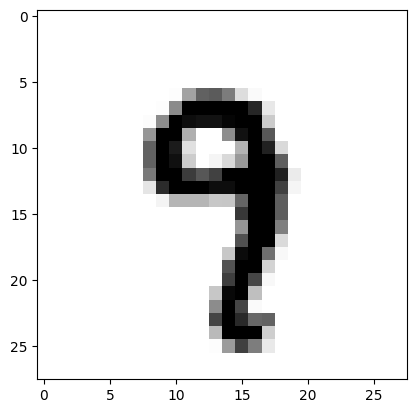

In [9]:
mlp.eval()              # turn the model to evaluate mode
index = 200
torch_X_test = torch.from_numpy(X_test.to_numpy()).type(torch.LongTensor)
image = torch_X_test[index].float().unsqueeze(0)
true_label = y_test.to_numpy()[index]
with torch.no_grad():     # does not calculate gradient
    class_index = mlp(image).argmax()   #gets the prediction for the image's class
plt.imshow(image.numpy().reshape(28,28,1), cmap='gray_r');
print(true_label)
print(class_index)

In [10]:
torch_X_train = torch_X_train.view(-1, 1,28,28).float()
torch_X_test = torch_X_test.view(-1,1,28,28).float()
print(torch_X_train.shape)
print(torch_X_test.shape)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

torch.Size([35700, 1, 28, 28])
torch.Size([6300, 1, 28, 28])


In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
 
cnn = CNN()
print(cnn)

it = iter(train_loader)
X_batch, y_batch = next(it)
print(cnn.forward(X_batch).shape)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([32, 10])


In [12]:
fit(cnn,train_loader)

Epoch : 0 [0/35700 (0%)]	Loss: 19.668039	 Accuracy:12.500%


Epoch : 0 [1600/35700 (4%)]	Loss: 2.115996	 Accuracy:17.096%
Epoch : 0 [3200/35700 (9%)]	Loss: 1.117861	 Accuracy:34.623%
Epoch : 0 [4800/35700 (13%)]	Loss: 0.680578	 Accuracy:47.082%
Epoch : 0 [6400/35700 (18%)]	Loss: 0.330606	 Accuracy:54.804%
Epoch : 0 [8000/35700 (22%)]	Loss: 0.644366	 Accuracy:60.309%
Epoch : 0 [9600/35700 (27%)]	Loss: 0.549091	 Accuracy:63.808%
Epoch : 0 [11200/35700 (31%)]	Loss: 0.334360	 Accuracy:67.121%
Epoch : 0 [12800/35700 (36%)]	Loss: 0.453750	 Accuracy:69.475%
Epoch : 0 [14400/35700 (40%)]	Loss: 0.482723	 Accuracy:71.473%
Epoch : 0 [16000/35700 (45%)]	Loss: 0.810768	 Accuracy:73.098%
Epoch : 0 [17600/35700 (49%)]	Loss: 0.403822	 Accuracy:74.603%
Epoch : 0 [19200/35700 (54%)]	Loss: 0.592631	 Accuracy:75.806%
Epoch : 0 [20800/35700 (58%)]	Loss: 0.451842	 Accuracy:76.872%
Epoch : 0 [22400/35700 (63%)]	Loss: 0.369644	 Accuracy:77.849%
Epoch : 0 [24000/35700 (67%)]	Loss: 0.081164	 Accuracy:78.733%
Epoch : 0 [25600/35700 (72%)]	Loss: 0.221638	 Accuracy:79.561%


9
tensor(9)


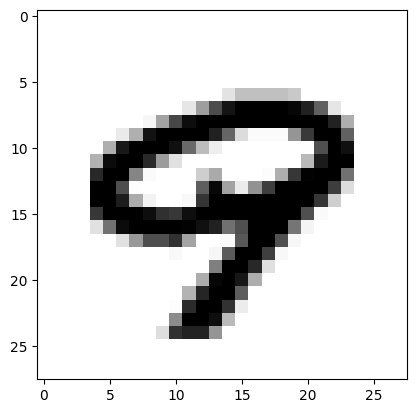

In [13]:
cnn.eval()              # turn the model to evaluate mode
index = 100
torch_X_test = torch_X_test.view(-1,1,28,28).float().type(torch.LongTensor)
image = torch_X_test[index].float().unsqueeze(0)
true_label = y_test.to_numpy()[index]
with torch.no_grad():     # does not calculate gradient
    class_index = cnn(image).argmax()   #gets the prediction for the image's class
plt.imshow(image.numpy().reshape(28,28,1), cmap='gray_r');
print(true_label)
print(class_index)

Describe the performance of the MLP and CNN models? Performance can include training time, accuracy, etc.
> Both models had comparable accuracy, though the MLP was slightly better. The MLP also trained much faster and was simpler to build. It seems like the MLP is better for simple datasets like MNIST. Maybe the CNN would have an advantage in more complicated image recognition.

Extra Credit: Describe the below code and the output

Init idx: 9
7.054989814758301 -0.0009773960337042809 -7.055967330932617

Job done, breaking
tensor([-2.1515, -2.0412, -2.2795, -2.4808, -2.4366, -2.5038, -2.5282, -2.3861,
        -2.0366, -2.3401])


8

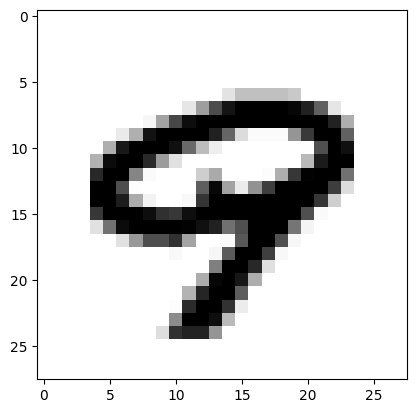

In [36]:
model = cnn
#torch_X_test = torch_X_test.view(-1,1,28,28).float().type(torch.LongTensor)
x = torch_X_test[index].float().clone()
x.requires_grad_(True)
with torch.no_grad():
    logits = model(x.unsqueeze(0)).squeeze()
    IMX = torch.argmax(logits)
print("Init idx:",IMX.item())
    
lr=.01
while True:
    logits = model(x.unsqueeze(0)).squeeze()
    
    imx = torch.argmax(logits)
    if imx!=IMX: 
        print("Job done, breaking")
        break
    y = logits.clone()
    y[imx] = -99
    loss = logits.max() - y.max() 
    loss.backward()
    
    
    x.data.sub_(lr*x.grad.data)
    print(loss.item(),logits.max().item(), y.max().item() )
    print()
    x.grad.data.zero_()
    x.data.sub_(x.data.min())
    x.data.mul_(1/x.data.max())
    
with torch.no_grad():
    print(model(x.unsqueeze(0)).squeeze())

plt.imshow(x.detach().cpu().numpy().transpose(1,2,0).reshape(28,28), cmap='gray_r');torch.argmax(model(x.unsqueeze(0))).item()

This code takes an image and gets the initial prediction for that image's class. Then it sets the class score for the current predicted value to a large, negative number. The gradient of the image with respect to the loss is calculated and the image is updated based on the data. Since the score for the correct class is low, the prediction moves away from the correct guess. The process is repeated until the prediction doesn't match the initial prediction, meaning that the altered image can fool the model.

The output is the initial prediction, the loss, the largest class score, the largest class score after the scores are altered, a congratulatory message, the class scores of the altered image, the new class prediction, and the altered image itself. I changed the colormap of the image to show reversed grayscale, like in the examples above.

It's pretty crazy to look at the image that tricked the model. Without analytical tools I can't see a difference between the nine that is correctly identified, and the altered image that fools the model.